In [1]:
#fundamental tools for the game environment model
import numpy as np
import multiprocess
from multiprocess import Process, Queue, Semaphore, Lock
import time
import random

# for visualations
import matplotlib.pyplot as plt

In [2]:
from randomchooser import Chooser
from exploresims import simulate_explore, sim_1, demo_1
import explore

pygame 2.5.1 (SDL 2.28.2, Python 3.11.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


When training a Reinforcement Learning (RL) model using the Bellman Equationor or Temporal Difference and discrete actions, it is overwhelmingly common to both emphasize the importance of input/action variance and to control output variance.

One is far more likely to encounter discussion, advice, and research pretaining to the controlling of the variance in the outputs of a system. This is the so called Variance or Bias Tradeoff. The propbelm here is of course the repetative use of the term Variance, but given its statistical signifagance it is mostly unavoidable.

This discussion and its accompanying demonstrations are focused on the other side of the spectrum. The variance of the expereinces provided to the model during training. How actions are selected and its impact on model convergence, and potentially overal policy quality.

For simplicity of the demonstrations, we shall focus our considerations to RL models most similar to DQN models utilizing something mathematically resembaling the Epsilon Greey Strategy and Expereince Replay Memory in line with Bellman Equation based reward optimizations (ie Deep Reinforcement Learning / Deep Q-Learning).

Note this restriction is arbitrary and simply serves to limit the scope of the demonstration, to keep things acesible, apologies to the more advanced reader.

Unlike the plethera of sources that discuss the Variance Bias Tradeoff of outputs, there are far less discussions on maximizing/minimizing the variance of actions selected by the model during its explorationary phases. It is quite the norm for texts, tutorials, examples, and the like to simply select a uniform distribution, justify it as being mathematically the highest variance, and therefore the least biased towards any one action type for the model to explore.

This is fine in theory, it feels intuitive, however this trend should not go unchallenged simply for its face value.

The reasoning here is that we want high variance in the random actions selected during exploration. The point is we want the model, for a time, to make entirely random moves. These moves should not "prefer" any one action and build a stored memeory of expereinces. Then we slowly allow the model to take its own actions and converge on some strategy. This is the fundamental idea behind the Epsilon Greedy strategy.

High Variance of the random selection ensures a diverse set of expereirences and the uniform nature of the distribution prevents bias in examples. This is why the commmon assumption is so intuitive and is rarely strayed from, or challenged.

To avoid this from being an endless drone, lets dip our toes in and  see some demonstrations and other visualizations. To this end I have put together a small game, called Explore. It is like a simple maze game, where an agent, or player, is represented bya blue square and must navigate to the exit or goal, represented by the green square.
There may be some number of grey walls obstructing the agent's path, but a path to the goal will always exist.
The agent may only choose to move up, down, left, right, or do nothing.

For visualization purposes the animation includes a trace or heatmap of the number of times a square has been visited. This matrix is then normalized sucht hat the most visited square is always full white, and unvisited squares are fully black.
Please run the next cell and observe this first agent "play". I won't mention what algorithm may be at play here, yet, but know the moves are entirely random.
10 games will be simulated, up to 80 moves each. The trace will be totaled over all 10 games.

In [5]:
demo_1()

In [3]:
max_processors = min(8, max(1, multiprocess.cpu_count()//2))
#Game params
game_size = 11
use_maze = False
use_exclusion = False
use_noise_boundary = 2
game_sparsity = .8

game_args = [game_size, use_maze, use_exclusion, use_noise_boundary, game_sparsity]

game_window_size = 100
game_window_framerate = 60

window_args = [game_window_size, game_window_framerate]


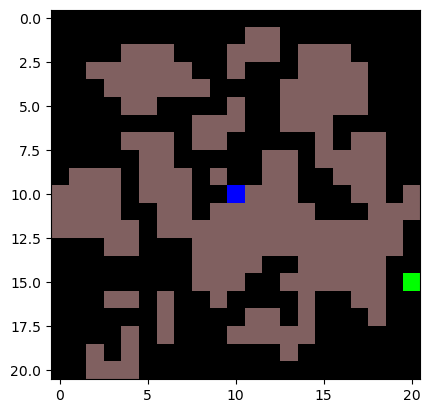

In [4]:
game = explore.ExploreGame()
game.draw()

In [5]:
choosers = []
choosers.append(Chooser(5))
if False:
    for i in range(3, 13):
        choosers.append(Chooser(5, [0,10,7.5,5,0], i))
    for i in range(3, 13):
        choosers.append(Chooser(5, [10,10,10,10,10], i))
    for i in range(3, 13):
        choosers.append(Chooser(5, [1,10,10,10,0], i))
else:
    choosers.append(Chooser(5, [0, 10, 7.5, 5, 0], 6))
    choosers.append(Chooser(5, [0, 10, 7.5, 5, 0], 4))
    choosers.append(Chooser(5, [0, 10, 7.5, 5, 0], 5))
    choosers.append(Chooser(5, [1, 10, 10, 10, 0], 7))
len(choosers)

5

In [6]:
out = sim_1(choosers, samples=100, games=10, num_process=8, num_column=3, env_args=game_args, window_args=window_args)

In [7]:
results = out

In [8]:
for k in range(len(results)):
    max_winrate = 0
    pos = 0
    for i in range(k, len(results)):
        if results[i][2][0] > max_winrate:
            max_winrate = results[i][2][0]
            pos = i
    temp = results[k]
    results[k] = results[pos]
    results[pos] = temp

In [9]:
for i in range(len(results)):
    print(results[i][2][0])

0.06
0.04
0.03
0.02
0.02


In [53]:
weights = []
durations = []
win_data = []
stdev_data = []
trace_averages = []
for result in results:
    weights.append(result[0])
    durations.append(result[1])
    win_data.append(result[2])
    stdev_data.append(result[3])
    trace_averages.append(result[4])

In [54]:
for (w, d, r) in zip(weights, durations, win_data):
    print(d, w, f"{r[0]:.4}", f"{r[2]:.3}", " <--> ", f"{r[0] - r[2]:.4}", " - ", f"{r[0] + r[2]:.4}")

12 [0, 10, 7.5, 5, 0] 0.236 0.0149  <-->  0.2211  -  0.2509
9 [0, 10, 7.5, 5, 0] 0.235 0.0152  <-->  0.2198  -  0.2502
9 [1, 10, 10, 10, 0] 0.235 0.0147  <-->  0.2203  -  0.2497
11 [0, 10, 7.5, 5, 0] 0.23 0.0145  <-->  0.2155  -  0.2445
8 [0, 10, 7.5, 5, 0] 0.226 0.0158  <-->  0.2102  -  0.2418
7 [0, 10, 7.5, 5, 0] 0.224 0.0153  <-->  0.2087  -  0.2393
6 [0, 10, 7.5, 5, 0] 0.222 0.0147  <-->  0.2073  -  0.2367
10 [0, 10, 7.5, 5, 0] 0.216 0.0149  <-->  0.2011  -  0.2309
12 [1, 10, 10, 10, 0] 0.212 0.0154  <-->  0.1966  -  0.2274
10 [1, 10, 10, 10, 0] 0.21 0.0139  <-->  0.1961  -  0.2239
11 [1, 10, 10, 10, 0] 0.208 0.0147  <-->  0.1933  -  0.2227
5 [0, 10, 7.5, 5, 0] 0.208 0.0142  <-->  0.1938  -  0.2222
7 [1, 10, 10, 10, 0] 0.204 0.0142  <-->  0.1898  -  0.2182
8 [1, 10, 10, 10, 0] 0.203 0.0139  <-->  0.1891  -  0.2169
12 [10, 10, 10, 10, 10] 0.2 0.014  <-->  0.186  -  0.214
9 [10, 10, 10, 10, 10] 0.198 0.014  <-->  0.184  -  0.212
11 [10, 10, 10, 10, 10] 0.196 0.0143  <-->  0.1817  -  

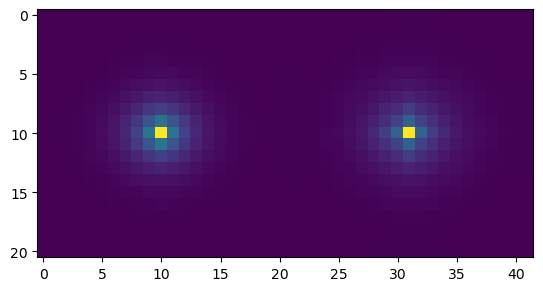

In [13]:
temp = np.hstack([trace_averages[-2], trace_averages[0]])
plt.imshow(temp)

In [43]:
mins = np.zeros(len(trace_averages))
for i in range(len(trace_averages)):
    mins[i] = trace_averages[i].min()
mins.mean()

1.4395645161290322

In [44]:
mins.std()

0.5024933281844916

In [38]:
trace_averages[-1].max()

524.6467

In [39]:
trace_averages[0].max()

489.7545

In [ ]:
#6 [0, 10, 7.5, 5, 0] 7.37 0.0274  <-->  7.343  -  7.398
#4 [0, 10, 7.5, 5, 0] 7.354 0.0276  <-->  7.326  -  7.381
#5 [0, 10, 7.5, 5, 0] 7.318 0.0275  <-->  7.291  -  7.346
#7 [1, 10, 10, 10, 0] 7.31 0.0277  <-->  7.282  -  7.337

In [10]:
win_averages = []
win_stds = []
win_errors = []
for win in win_data:
    win_averages.append(win[0])
    win_stds.append(win[1])
    win_errors.append(win[2])

In [11]:
stdev_averages = []
stdev_stds = []
stdev_errors = []
for stdev in stdev_data:
    stdev_averages.append(stdev[0])
    stdev_stds.append(stdev[1])
    stdev_errors.append(stdev[2])

In [12]:
for (mean, error) in zip(stdev_averages, stdev_errors):
    print(mean, error)

21.915006421778063 0.10708246384246096
15.2103472534303 0.08477570267273185
16.418986514123485 0.08330403448770658
17.957885942316455 0.082570717415026
19.480932797157642 0.08758232776463426
21.781383165100706 0.09574792182765507
15.629925028396283 0.08976795817382
13.687060319755307 0.06589713849537174
14.736647638912821 0.08364109341070006
14.072948662005137 0.08261498998746902
13.682836146118154 0.09185016762984498
14.127084552989043 0.08014547039543578


In [3]:
ch1 = Chooser(5)
ch2 = Chooser(5, [1,10,10,10,1])

In [5]:
lol1 = Process(target=simulate_explore, args=[sem, out_lock, output_queue, 100,100,40, ch1, 15, 1.08])
lol2 = Process(target=simulate_explore, args=[sem, out_lock, output_queue, 100,100,40, ch2, 15, 1.08])

In [6]:
lol1.start()
lol2.start()

In [8]:
lol1.join()
lol2.join()

In [10]:
list = []
if list:
    print("hi")